In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the processed dataset
df = pd.read_csv("data/data.csv")

# Selecting numerical features for clustering
features = ["valence", "danceability", "energy", "acousticness", 
            "instrumentalness", "liveness", "speechiness", "tempo"]

X = df[features]

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display first few rows
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


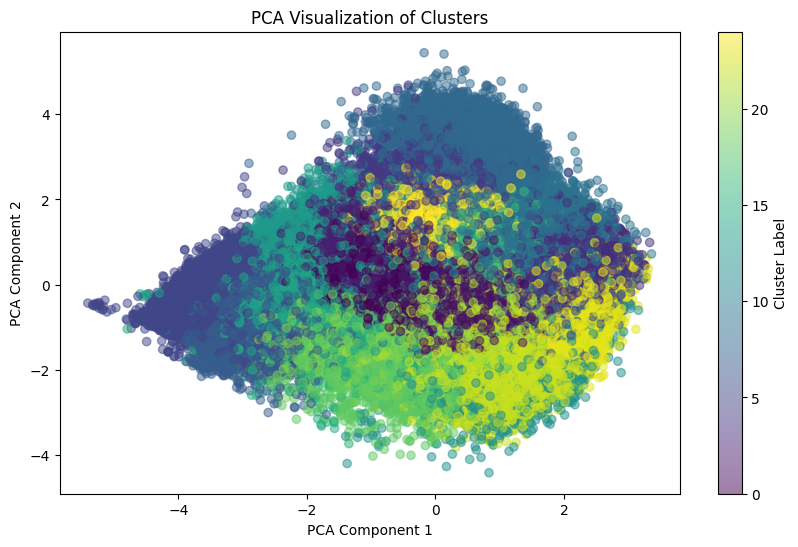

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=25, random_state=42)
df["cluster_label"] = kmeans.fit_predict(X_scaled)

# Save the updated dataset
df.to_csv("data/advanced_spotify_data.csv", index=False)

# PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["cluster_label"], cmap="viridis", alpha=0.5)
plt.colorbar(label="Cluster Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Clusters")
plt.show()




In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_songs(song_name, df, n_recommendations=5):
    # Find song in dataset
    song = df[df["name"].str.lower() == song_name.lower()]
    if song.empty:
        return "Song not found!"
    
    # Compute similarity using Cosine Similarity
    song_index = song.index[0]
    similarity_scores = cosine_similarity([X_scaled[song_index]], X_scaled)
    
    # Get top N similar songs
    top_indices = np.argsort(similarity_scores[0])[::-1][1:n_recommendations+1]
    recommendations = df.iloc[top_indices][["name", "artists", "popularity"]]
    
    return recommendations

# Test with a song from dataset
recommend_songs("Blinding Lights", df)


,name,artists,popularity
71268,Latin Simone (Que Pasa Contigo),['Gorillaz'],45
154586,You Are Loved,['Stars Go Dim'],50
125175,Ren og rettferdig,['Stagedive Live'],11
17964,Made in America,['Toby Keith'],62
35120,Sirens,['The String Cheese Incident'],54
